# Evoked campaign analysis using BlueETL

In [1]:
import blueetl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tqdm
import yaml

from blueetl.analysis import run_from_file
from blueetl.campaign.config import SimulationCampaign
from bluepysnap import Circuit, Simulation

In [2]:
# Select campaign to analyze
# campaign_config = "/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2_recal/SSCx-HexO1-Release-TC-R2__Baseline__Hex0-Evoked-PFR-VPM-Scan/config.json"
# campaign_config = "/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2_recal/SSCx-HexO1-Release-TC-R2__ConnRewireOrder1Hex0EE__Hex0-Evoked-PFR-VPM-Scan/config.json"
campaign_config = "/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2_recal/SSCx-HexO1-Release-TC-R2__ConnRewireOrder2Hex0EE__Hex0-Evoked-PFR-VPM-Scan/config.json"
campaign = SimulationCampaign.load(campaign_config)
campaign_name = os.path.split(os.path.split(campaign_config)[0])[-1]
print(f"INFO: Campaign loaded: '{campaign_name}'")

INFO: Campaign loaded: 'SSCx-HexO1-Release-TC-R2__ConnRewireOrder2Hex0EE__Hex0-Evoked-PFR-VPM-Scan'


In [3]:
# Set output folder (output_path=None to skip saving)
output_root = "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2_recal"
output_path = os.path.join(output_root, campaign_name)
if not os.path.exists(output_path):
    os.makedirs(output_path)
print(f"INFO: Output path: '{output_path}'")

INFO: Output path: '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2_recal/SSCx-HexO1-Release-TC-R2__ConnRewireOrder2Hex0EE__Hex0-Evoked-PFR-VPM-Scan'


In [ ]:
# # Plot spike trains
# fig_raster = plt.figure(figsize=(10, 2 * len(campaign)))
# axs_raster = fig_raster.subplots(len(campaign), 1, squeeze=False)
# fig_rates = plt.figure(figsize=(10, 2 * len(campaign)))
# axs_rates = fig_rates.subplots(len(campaign), 1, squeeze=False)
# for sidx, sim in enumerate(tqdm.tqdm(campaign)):
#     sim_cond = ", ".join([f"{_k}: {_v}" for _k, _v in sim.conditions.items()])
#     stim_file = os.path.join(os.path.split(sim.path)[0], "stim_times.txt")
#     t_stim = pd.read_table(stim_file, header=None).to_numpy().flatten()

#     axs_raster[sidx][0].set_title(sim_cond, fontweight="bold", loc="left")
#     axs_rates[sidx][0].set_title(sim_cond, fontweight="bold", loc="left")

#     sim_data = Simulation(sim.path)
#     output_file = os.path.join(sim_data.spikes.config.output_dir, sim_data.spikes.config.spikes_file)
#     if os.path.exists(output_file):
#         sim_data.spikes.filter("Excitatory").raster(ax=axs_raster[sidx][0])
#         sim_data.spikes.filter("Inhibitory").raster(ax=axs_raster[sidx][0])
#         axs_raster[sidx][0].vlines(t_stim, *axs_raster[sidx][0].get_ylim(), color="k", alpha=0.5)
#         axs_raster[sidx][0].legend(["EXC", "INH", "STIM"], loc="lower right", bbox_to_anchor=[1.0, 1.0], ncols=3, frameon=False)
#         axs_raster[sidx][0].set_xlabel("Time (ms)")
#         axs_raster[sidx][0].set_ylabel("Neuron ID")

#         sim_data.spikes.filter("Excitatory").firing_rate_histogram(ax=axs_rates[sidx][0])
#         sim_data.spikes.filter("Inhibitory").firing_rate_histogram(ax=axs_rates[sidx][0])
#         axs_rates[sidx][0].vlines(t_stim, *axs_rates[sidx][0].get_ylim(), color="k", alpha=0.5)
#         axs_rates[sidx][0].legend(["EXC", "INH", "STIM"], loc="lower right", bbox_to_anchor=[1.0, 1.0], ncols=3, frameon=False)
#         axs_rates[sidx][0].set_xlabel("Time (ms)")
#         axs_rates[sidx][0].set_ylabel("Rate (Hz)")
#     else:
#         print(f"ERROR: Sim data error {sim.conditions}!")
# fig_raster.tight_layout()
# fig_rates.tight_layout()
# if output_path is not None:
#     fig_raster.savefig(os.path.join(output_path, "raster_plots.png"), dpi=300)
#     fig_rates.savefig(os.path.join(output_path, "rate_plots.png"), dpi=300)
# fig_raster.show()
# fig_rates.show()

In [4]:
# Select BlueETL analysis config (prepare from template if not existing)
analysis_cfg_file = f"evoked_analysis_config__{campaign_name}.yaml"
if os.path.exists(analysis_cfg_file):
    print(f"INFO: Using existing analysis config file '{analysis_cfg_file}'!")
else:
    ## Load template
    analysis_template = "evoked_analysis_config.tmpl"
    with open(analysis_template, "r") as f:
        analysis_cfg = yaml.safe_load(f)

    ## Fill in missing info
    analysis_cfg["simulation_campaign"] = campaign_config
    analysis_cfg["cache"]["path"] = output_path

    #Write config file
    with open(analysis_cfg_file, "w") as f:
        yaml.safe_dump(analysis_cfg, f)
    print(f"INFO: Created analysis config file '{analysis_cfg_file}' from template!")

INFO: Using existing analysis config file 'evoked_analysis_config__SSCx-HexO1-Release-TC-R2__ConnRewireOrder2Hex0EE__Hex0-Evoked-PFR-VPM-Scan.yaml'!


In [5]:
# Run BlueETL analysis (or load from cache, if exisiting)
ma = run_from_file(analysis_cfg_file, loglevel="INFO")

2024-07-26 12:23:41,886 INFO blueetl.analysis: MultiAnalyzer configuration: evoked_analysis_config__SSCx-HexO1-Release-TC-R2__ConnRewireOrder2Hex0EE__Hex0-Evoked-PFR-VPM-Scan.yaml
2024-07-26 12:23:42,085 INFO blueetl.cache: Loading cached checksums from /gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2_recal/SSCx-HexO1-Release-TC-R2__ConnRewireOrder2Hex0EE__Hex0-Evoked-PFR-VPM-Scan/spikes/config/checksums.cached.yaml
2024-07-26 12:23:42,090 INFO blueetl.cache: Initialize cache
2024-07-26 12:23:44,870 INFO blueetl.extract.simulations: Simulations ignored because missing: 0
2024-07-26 12:23:44,871 INFO blueetl.extract.simulations: Simulations ignored because incomplete: 0
2024-07-26 12:23:44,872 INFO blueetl.extract.simulations: Simulations filtered out: 0, with query: None
2024-07-26 12:23:44,875 INFO blueetl.extract.simulations: Simulations extracted: 20/20, ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2024-07-26 12:23:4

INFO: Simulation conditions: ['desired_connected_proportion_of_invivo_frs', 'vpm_pct']
      *desired_connected_proportion_of_invivo_frs: [0.1 0.3 0.5 0.7 0.9]
      *vpm_pct: [ 5 10 15 20]


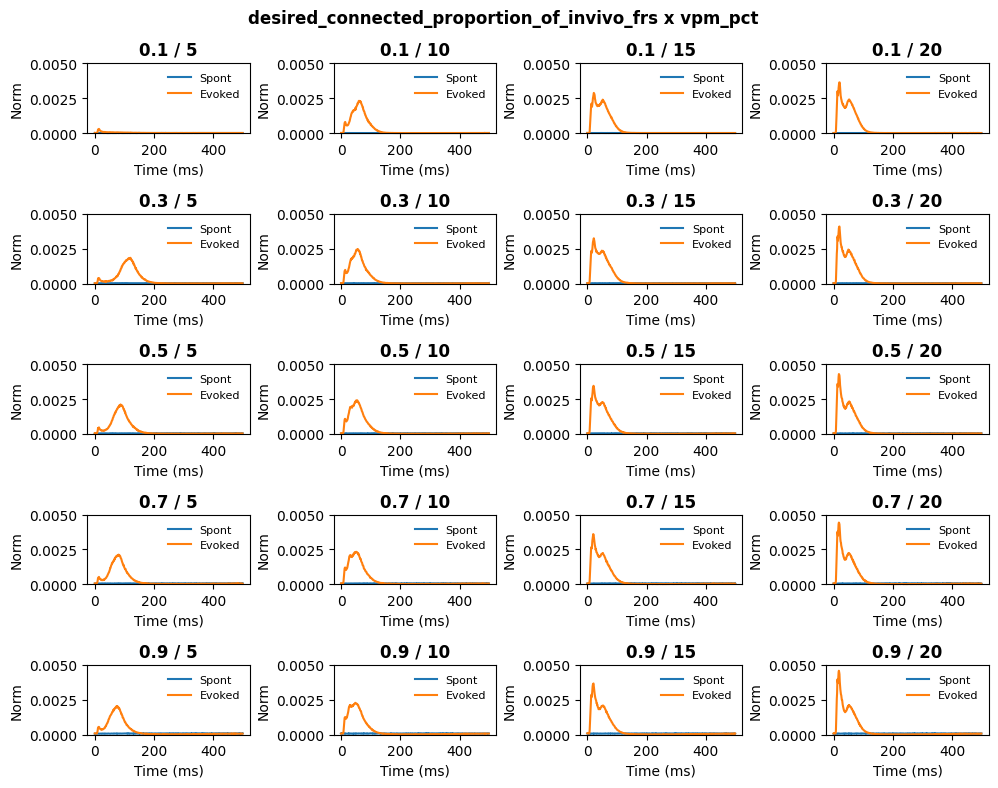

In [6]:
# Plot histograms per condition (2D grid)
cond_names = ma.spikes.repo.simulations_config.condition_names
print(f"INFO: Simulation conditions: {cond_names}")
assert len(cond_names) == 2, "ERROR: 2 conditions expected!"

cond_values = {_cond: ma.spikes.repo.simulations_config.conditions[_cond].unique() for _cond in cond_names}
for _cond, _val in cond_values.items():
    print(f"      *{_cond}: {_val}")

y_lim = 0.005
plt.figure(figsize=(2 * len(cond_values[cond_names[0]]), 2 * len(cond_values[cond_names[1]])))
_idx = 0
for _val0 in cond_values[cond_names[0]]:
    for _val1 in cond_values[cond_names[1]]:
        sim_id = ma.spikes.repo.simulations.df.etl.q({cond_names[0]: _val0, cond_names[1]: _val1})["simulation_id"].values
        assert len(sim_id) == 1, "ERROR: Multiple sim IDs found!"
        sim_id = sim_id[0]
        plt.subplot(len(cond_values[cond_names[0]]), len(cond_values[cond_names[1]]), _idx + 1)
        _idx += 1

        h_evoked = ma.spikes.features.histograms.df.etl.q(simulation_id=sim_id, neuron_class="ALL", window="w_evoked")
        h_spont = ma.spikes.features.histograms.df.etl.q(simulation_id=sim_id, neuron_class="ALL", window="w_spont")
        plt.plot(h_spont.etl.labels_of("bin"), h_spont["spike_times_normalised_hist_1ms_bin"], label="Spont", clip_on=False)
        plt.plot(h_evoked.etl.labels_of("bin"), h_evoked["spike_times_normalised_hist_1ms_bin"], label="Evoked", clip_on=False)
        plt.ylim([0, y_lim])
        plt.title(f"{_val0} / {_val1}", fontweight="bold")
        plt.xlabel("Time (ms)")
        plt.ylabel("Norm")
        plt.legend(loc="upper right", frameon=False, fontsize=8)
plt.suptitle(f"{cond_names[0]} x {cond_names[1]}", fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "hist_plots.png"), dpi=300)
plt.show()

In [7]:
fr_evoked_exc = ma.spikes.features.by_neuron_class.df.etl.q(neuron_class="ALL_EXC", window="w_evoked")["mean_of_mean_firing_rates_per_second"]
fr_evoked_inh = ma.spikes.features.by_neuron_class.df.etl.q(neuron_class="ALL_INH", window="w_evoked")["mean_of_mean_firing_rates_per_second"]
fr_spont_exc = ma.spikes.features.by_neuron_class.df.etl.q(neuron_class="ALL_EXC", window="w_spont")["mean_of_mean_firing_rates_per_second"]
fr_spont_inh = ma.spikes.features.by_neuron_class.df.etl.q(neuron_class="ALL_INH", window="w_spont")["mean_of_mean_firing_rates_per_second"]

In [8]:
sim_ids = fr_evoked_exc.etl.labels_of("simulation_id")
assert np.array_equal(sim_ids, fr_evoked_inh.etl.labels_of("simulation_id")), "ERROR: Sim ID mismatch!"
assert np.array_equal(sim_ids, fr_spont_exc.etl.labels_of("simulation_id")), "ERROR: Sim ID mismatch!"
assert np.array_equal(sim_ids, fr_spont_inh.etl.labels_of("simulation_id")), "ERROR: Sim ID mismatch!"
ev_rates_exc = fr_evoked_exc.values
ev_rates_inh = fr_evoked_inh.values
sp_rates_exc = fr_spont_exc.values
sp_rates_inh = fr_spont_inh.values
conds = ma.spikes.repo.simulations_config.conditions.loc[sim_ids]
vpm = conds["vpm_pct"].values
pfr = conds["desired_connected_proportion_of_invivo_frs"].values

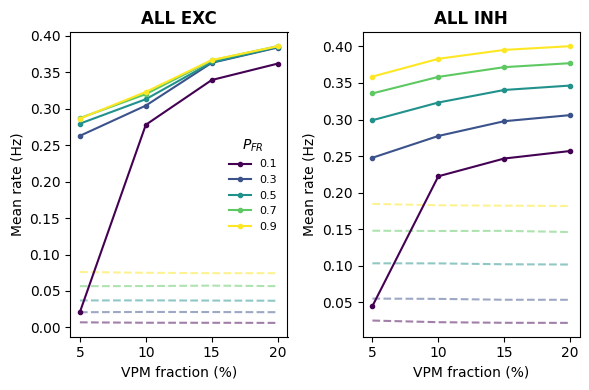

In [10]:
pfr_colors = plt.cm.viridis(np.linspace(0, 1, len(cond_values["desired_connected_proportion_of_invivo_frs"])))
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
for _idx, _pfr in enumerate(cond_values["desired_connected_proportion_of_invivo_frs"]):
    plt.plot(vpm[pfr==_pfr], sp_rates_exc[pfr==_pfr], "--", color=pfr_colors[_idx], alpha=0.5, zorder=-100)
    plt.plot(vpm[pfr==_pfr], ev_rates_exc[pfr==_pfr], ".-", label=f"{_pfr}", color=pfr_colors[_idx])
plt.legend(title="$P_{FR}$", frameon=False, loc="right", ncols=1, fontsize=8)
plt.title("ALL EXC", fontweight="bold")
plt.xlabel("VPM fraction (%)")
plt.ylabel("Mean rate (Hz)")

plt.subplot(1, 2, 2)
for _idx, _pfr in enumerate(cond_values["desired_connected_proportion_of_invivo_frs"]):
    plt.plot(vpm[pfr==_pfr], sp_rates_inh[pfr==_pfr], "--", color=pfr_colors[_idx], alpha=0.5, zorder=-100)
    plt.plot(vpm[pfr==_pfr], ev_rates_inh[pfr==_pfr], ".-", label=f"{_pfr}", color=pfr_colors[_idx])
plt.title("ALL INH", fontweight="bold")
plt.xlabel("VPM fraction (%)")
plt.ylabel("Mean rate (Hz)")

plt.tight_layout()
plt.savefig(os.path.join(output_path, "mean_rate_plots.png"), dpi=300)
plt.show()